In [6]:
import matplotlib.pyplot as plt
import os
import numpy as np
os.getcwd()

'/Users/rabeya/URAP/UCSF_Lab/Practice_Project_1'

In [3]:
ls

Training_npy_images/                 mass_case_description_test_set.csv
URAP_Project1_MedImageData.ipynb     mass_case_description_train_set.csv
full_testing_data.npz                unpacked_testing_files/
full_training_data.npz               unpacked_training_files/


In [4]:
cd Mammogram_Training_DICOM_files

[Errno 2] No such file or directory: 'Mammogram_Training_DICOM_files'
/Users/rabeya/URAP/UCSF_Lab/Practice_Project_1


In [5]:
cd ..

/Users/rabeya/URAP/UCSF_Lab


In [6]:
project_dir = os.getcwd()


In [7]:
path_to_files = []

counter = 0
for root, dirs, files in os.walk(project_dir):
    for file in files:
        if file.endswith(".dcm"):
            counter += 1
            path_to_files.append(os.path.join(root, file))

In [8]:
ls

Practice_Project_1/


In [9]:
import shutil
shutil.move(path_to_files[0], "/Users/rabeya/URAP/UCSF_Lab/Practice_Project_1/unpacked_training_files/"+path_to_files[0].split('/')[-1])


'/Users/rabeya/URAP/UCSF_Lab/Practice_Project_1/unpacked_training_files/train_107.dcm'

In [10]:
for i in range(1, len(path_to_files)):
    new_file_name = str(i)+path_to_files[i].split('/')[-1]
    unpack_dir = "/Users/rabeya/URAP/UCSF_Lab/Practice_Project_1/unpacked_training_files/"
    shutil.move(path_to_files[i], unpack_dir+new_file_name)
    

In [11]:
unpack_test_dir = "/Users/rabeya/URAP/UCSF_Lab/Practice_Project_1/unpacked_testing_files/"


In [12]:
!ls

Practice_Project_1


In [13]:
os.getcwd()

'/Users/rabeya/URAP/UCSF_Lab'

In [14]:
current_path = '/Users/rabeya/URAP/UCSF_Lab/Practice_Project_1/unpacked_training_files/'
files = os.listdir(current_path)

for file in files:
    d = len(file)-10
    os.rename(os.path.join(current_path, file), os.path.join(current_path, 'train_'+file[:d]+'.dcm'))
    


In [15]:
paths_to_test_files = []
testing_dir = '/Users/rabeya/URAP/UCSF_Lab/Practice_Project_1/testing_data_DICOM_folders/'

counter = 0
for root, dirs, files in os.walk(testing_dir):
    for file in files:
        if file.endswith(".dcm"):
            counter += 1
            paths_to_test_files.append(os.path.join(root, file))

In [16]:
for i in range(0, len(paths_to_test_files)):
    new_file_name = 'train_'+str(i)+'.dcm'
    unpack_test_dir = "/Users/rabeya/URAP/UCSF_Lab/Practice_Project_1/unpacked_testing_files/"
    shutil.move(paths_to_test_files[i], unpack_test_dir+new_file_name)

In [17]:
current_path = '/Users/rabeya/URAP/UCSF_Lab/Practice_Project_1/unpacked_testing_files/'
files = os.listdir(current_path)

for file in files:
    os.rename(os.path.join(current_path, file), os.path.join(current_path, 'test_'+file[5:]))

In [133]:
training_file_list = os.listdir('/Users/rabeya/URAP/UCSF_Lab/Practice_Project_1/unpacked_training_files/')
os.chdir('/Users/rabeya/URAP/UCSF_Lab/Practice_Project_1')


In [217]:
# NOTE: This cell was created AFTER the initial running of the entire script. 
# This cell was necessay because in my second run, I ran into problems importing packages,
# mainly because I wasn't using the Anaconda version of Jupyter Notebook (which caused file mis-location)

# Rename the files 
# I am doing this due to a Jupyter Notebook error made it unable to import packages I had installed
# The files are existing but with the wrong names

# This part was necessary to re-order the list

project_folder = '/Users/rabeya/URAP/UCSF_Lab/Practice_Project_1/'
for file in os.listdir('/Users/rabeya/URAP/UCSF_Lab/Practice_Project_1/unpacked_training_files/'):
    if any(ch.isdigit() for ch in file):
        label = int(''.join(list(filter(str.isdigit, file))))
        os.rename(project_folder+'unpacked_training_files/'+file, project_folder+'unpacked_training_files/'+'train'+str(label)+'.dcm')
    

# Finally, reorder the files
final_training_files = []
for file in os.listdir(project_folder+'unpacked_training_files/'):
    if file.split('.')[0].isalnum():
        final_training_files.append(file)
        
final_training_files = sorted(final_training_files, key=lambda x:int(''.join(list(filter(str.isdigit, x)))))


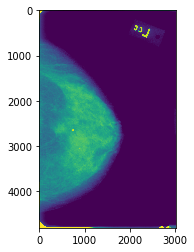

In [304]:
import numpy as np
import pydicom

# Test display image
ex_image = final_training_files[67]
img_ex_data = pydicom.dcmread(training_folder+ex_image)
plt.imshow(img_ex_data.pixel_array)

In [283]:
import numpy as np

# library to open .png file
from PIL import Image 

import pydicom

from skimage import data, color
from skimage.transform import rescale, resize


# Part 4) function below:
# This function will check the extension of a file (either DICOM or PNG), 
# read the file, and then convert it into a NumpyZ compressed file 

def image_file_to_numpyz(filename, label_category, parent_folder, destination_name, imgsize):
    # Check file extension
    extension = filename.split('.')[-1]
    
    if extension == 'dcm':
        # Read data
        data = pydicom.dcmread(parent_folder+filename)
        dicom_array = data.pixel_array
        
        # Resize the Numpy array
        resized_array = resize(dicom_array, (imgsize[0], imgsize[1]),
                       anti_aliasing=True)
        
        # save NumpZ file
        np.savez_compressed(destination_name, a=resized_array, b=label_category)
        
    elif extension == 'png':
        # Read Data
        data = Image.open(parent_folder+filename)
        png_array = np.asarray(data)
        
        # Resize the Numpy array
        resized_array = resize(png_array, (imgsize[0], imgsize[1]),
                       anti_aliasing=True)
        
        # save NumpZ file
        np.savez_compressed(destination_name, a=resized_array, b=label_category)
        
    elif extension == 'jpg':
        # Read Data
        data = Image.open(parent_folder+filename)
        jpg_array = np.asarray(data)
        
        # Resize the Numpy array
        resized_array = resize(jpg_array, (imgsize[0], imgsize[1]),
                       anti_aliasing=True)
        
        # save NumpZ file
        np.savez_compressed(destination_name, a=resized_array, b=label_category)



In [233]:
# Let's read in the csv description file for Mass_Training!
project_folder = '/Users/rabeya/URAP/UCSF_Lab/Practice_Project_1/'

import pandas as pd
training_dframe = pd.read_csv(project_folder+'mass_case_description_train_set.csv', header='infer')

In [234]:
training_dframe.iloc[0:,:]

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....
5,P_00009,3,RIGHT,CC,1,mass,OVAL,ILL_DEFINED,4,MALIGNANT,4,Mass-Training_P_00009_RIGHT_CC/1.3.6.1.4.1.959...,Mass-Training_P_00009_RIGHT_CC_1/1.3.6.1.4.1.9...,Mass-Training_P_00009_RIGHT_CC_1/1.3.6.1.4.1.9...
6,P_00009,3,RIGHT,MLO,1,mass,OVAL,ILL_DEFINED,4,MALIGNANT,4,Mass-Training_P_00009_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00009_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00009_RIGHT_MLO_1/1.3.6.1.4.1....
7,P_00015,3,LEFT,MLO,1,mass,IRREGULAR,ILL_DEFINED-SPICULATED,4,MALIGNANT,4,Mass-Training_P_00015_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00015_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00015_LEFT_MLO_1/1.3.6.1.4.1.9...
8,P_00018,2,RIGHT,CC,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00018_RIGHT_CC/1.3.6.1.4.1.959...,Mass-Training_P_00018_RIGHT_CC_1/1.3.6.1.4.1.9...,Mass-Training_P_00018_RIGHT_CC_1/1.3.6.1.4.1.9...
9,P_00018,2,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00018_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00018_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00018_RIGHT_MLO_1/1.3.6.1.4.1....


In [235]:
sample_training = training_dframe.iloc[0:201,:]
sample_training

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....
5,P_00009,3,RIGHT,CC,1,mass,OVAL,ILL_DEFINED,4,MALIGNANT,4,Mass-Training_P_00009_RIGHT_CC/1.3.6.1.4.1.959...,Mass-Training_P_00009_RIGHT_CC_1/1.3.6.1.4.1.9...,Mass-Training_P_00009_RIGHT_CC_1/1.3.6.1.4.1.9...
6,P_00009,3,RIGHT,MLO,1,mass,OVAL,ILL_DEFINED,4,MALIGNANT,4,Mass-Training_P_00009_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00009_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00009_RIGHT_MLO_1/1.3.6.1.4.1....
7,P_00015,3,LEFT,MLO,1,mass,IRREGULAR,ILL_DEFINED-SPICULATED,4,MALIGNANT,4,Mass-Training_P_00015_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00015_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00015_LEFT_MLO_1/1.3.6.1.4.1.9...
8,P_00018,2,RIGHT,CC,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00018_RIGHT_CC/1.3.6.1.4.1.959...,Mass-Training_P_00018_RIGHT_CC_1/1.3.6.1.4.1.9...,Mass-Training_P_00018_RIGHT_CC_1/1.3.6.1.4.1.9...
9,P_00018,2,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00018_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00018_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00018_RIGHT_MLO_1/1.3.6.1.4.1....


In [236]:
binary_sample_training = sample_training.copy()

In [237]:
mapping = {1:'NOT_DENSE', 2:'NOT_DENSE', 3:'DENSE', 4:'DENSE'}

In [238]:
binary_sample_training['breast_density'] = binary_sample_training['breast_density'].map(mapping)


In [239]:
binary_sample_training.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,DENSE,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,DENSE,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,DENSE,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,DENSE,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,DENSE,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


In [240]:
os.mkdir('Training_npy_images')

FileExistsError: [Errno 17] File exists: 'Training_npy_images'

In [243]:
os.chdir(project_folder+'Training_npy_images')
os.getcwd()

'/Users/rabeya/URAP/UCSF_Lab/Practice_Project_1/Training_npy_images'

In [252]:
project_folder

'/Users/rabeya/URAP/UCSF_Lab/Practice_Project_1/'

In [258]:
density_labels = binary_sample_training['breast_density']
density_labels[0]

'DENSE'

In [282]:
final_training_files[0].split('.')[0]+'NPZ'

'train0NPZ'

In [284]:
# This piece of code basically goes through each image .dcm file, 
# extracts the image matrix, reshapes it to (299x299), then deposits 
# the matrix into a list

Size = (299,299)
location_to_save = project_folder+'Training_npy_images/'

for file, label in zip(final_training_files, density_labels):
    try:
        new_name = file.split('.')[0]+'NPZ'
        image_file_to_numpyz(file, label, project_folder+'unpacked_training_files/', location_to_save+new_name, Size)
        print('Image file'+ file[5:-4] +' saved as NumpyZ!')
        
    except ValueError as e:
        print('Image {} Data not readable!'.format(file[5:-4]))
        continue


/Users/rabeya/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Image file0 saved as NumpyZ!
Image file1 saved as NumpyZ!
Image file2 saved as NumpyZ!
Image file3 saved as NumpyZ!
Image file4 saved as NumpyZ!
Image file5 saved as NumpyZ!
Image file6 saved as NumpyZ!
Image file7 saved as NumpyZ!
Image file8 saved as NumpyZ!
Image file9 saved as NumpyZ!
Image file10 saved as NumpyZ!
Image file11 saved as NumpyZ!
Image file12 saved as NumpyZ!
Image file13 saved as NumpyZ!
Image file14 saved as NumpyZ!
Image file15 saved as NumpyZ!
Image file16 saved as NumpyZ!
Image file17 saved as NumpyZ!
Image file18 saved as NumpyZ!
Image file19 saved as NumpyZ!
Image file20 saved as NumpyZ!
Image file21 saved as NumpyZ!
Image file22 saved as NumpyZ!
Image file23 saved as NumpyZ!
Image file24 saved as NumpyZ!
Image file25 saved as NumpyZ!
Image file26 saved as NumpyZ!
Image file27 saved as NumpyZ!
Image file28 saved as NumpyZ!
Image file29 saved as NumpyZ!
Image file30 saved as NumpyZ!
Image file31 saved as NumpyZ!
Image file32 saved as NumpyZ!
Image file33 saved a

In [287]:
os.chdir('/Users/rabeya/URAP/UCSF_Lab/Practice_Project_1/')
os.getcwd()

'/Users/rabeya/URAP/UCSF_Lab/Practice_Project_1'

In [288]:
os.mkdir('Testing_npy_images')

In [295]:
# Let's read in the csv description file for Mass_Testing!
project_folder = '/Users/rabeya/URAP/UCSF_Lab/Practice_Project_1/'

# get the test data dataframe
import pandas as pd
testing_dframe = pd.read_csv(project_folder+'mass_case_description_test_set.csv', header='infer')
sample_testing = testing_dframe.iloc[0:177,:]


# Create the binary-label (for density) dataframe
# Rename the column items to "DENSE/NOT_DENSE" binary labels
binary_sample_testing = sample_testing.copy()
mapping = {1:'NOT_DENSE', 2:'NOT_DENSE', 3:'DENSE', 4:'DENSE'}
binary_sample_testing['breast_density'] = binary_sample_testing['breast_density'].map(mapping)


#Isolate the labels series
test_density_labels = binary_sample_testing['breast_density']

test_density_labels.head(6)

0        DENSE
1        DENSE
2    NOT_DENSE
3    NOT_DENSE
4        DENSE
5        DENSE
Name: breast_density, dtype: object

In [293]:
# This cell is for renaming the testing image files

# NOTE: This cell was created AFTER the initial running of the entire script. 
# This cell was necessay because in my second run, I ran into problems importing packages,
# mainly because I wasn't using the Anaconda version of Jupyter Notebook (which caused file mis-location)

# Rename the files 
# I am doing this due to a Jupyter Notebook error made it unable to import packages I had installed
# The files are existing but with the wrong names

# This part was necessary to re-order the list

project_folder = '/Users/rabeya/URAP/UCSF_Lab/Practice_Project_1/'
for file in os.listdir('/Users/rabeya/URAP/UCSF_Lab/Practice_Project_1/unpacked_testing_files/'):
    if any(ch.isdigit() for ch in file):
        label = int(''.join(list(filter(str.isdigit, file))))
        os.rename(project_folder+'unpacked_testing_files/'+file, project_folder+'unpacked_testing_files/'+'test'+str(label)+'.dcm')
    

# Finally, reorder the files
final_testing_files = []
for file in os.listdir(project_folder+'unpacked_testing_files/'):
    if file.split('.')[0].isalnum():
        final_testing_files.append(file)
        
final_testing_files = sorted(final_testing_files, key=lambda x:int(''.join(list(filter(str.isdigit, x)))))


In [300]:
# This code is the same as saving the .npz training files - I'm just applying it to test-files now

# This piece of code basically goes through each image .dcm file, 
# extracts the image matrix, reshapes it to (299x299), then deposits 
# the matrix into a list

Size = (299,299)
location_to_save = project_folder+'Testing_npy_images/'

for file, label in zip(final_testing_files, test_density_labels):
    try:
        new_name = file.split('.')[0]+'NPZ'
        image_file_to_numpyz(file, label, project_folder+'unpacked_testing_files/', location_to_save+new_name, Size)
        print('Image file'+ file[4:-4] +' saved as NumpyZ!')
        
    except ValueError as e:
        print('Image {} Data not readable!'.format(file[4:-4]))
        continue


/Users/rabeya/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Image file201 saved as NumpyZ!
Image file202 saved as NumpyZ!
Image file203 saved as NumpyZ!
Image file204 saved as NumpyZ!
Image file205 saved as NumpyZ!
Image file206 saved as NumpyZ!
Image file207 saved as NumpyZ!
Image file208 saved as NumpyZ!
Image file209 saved as NumpyZ!
Image file210 saved as NumpyZ!
Image file211 saved as NumpyZ!
Image file212 saved as NumpyZ!
Image file213 saved as NumpyZ!
Image file214 saved as NumpyZ!
Image file215 saved as NumpyZ!
Image file216 saved as NumpyZ!
Image file217 saved as NumpyZ!
Image file218 saved as NumpyZ!
Image file219 saved as NumpyZ!
Image file220 saved as NumpyZ!
Image file221 saved as NumpyZ!
Image file222 saved as NumpyZ!
Image file223 saved as NumpyZ!
Image file224 saved as NumpyZ!
Image file225 saved as NumpyZ!
Image file226 saved as NumpyZ!
Image file227 saved as NumpyZ!
Image file228 saved as NumpyZ!
Image file229 saved as NumpyZ!
Image file230 saved as NumpyZ!
Image file231 saved as NumpyZ!
Image file232 saved as NumpyZ!
Image fi

In [2]:
# Alright, time to build a Neural Network!

# Before we start building the "ResNet architecture", let's start learning
# by buildinga the 'simple version' of a convolutional neural network (2D CNN)

# It works by taking the image data, using a filter on the image (called 'convolving')
# in order to detect edges, dark and bright spots, and other image characteristics
# Then these pieces of data are combined, pooled (meaning finding the max. value in
# a filter window), and then put through a dense connected layer.

# This system of Conv. -> Max Pooling -> Dense Layer is repeated 2-3 times,
# and finally we will have a Dropout layer (to correct for overfitting).

# First, we need to import Tensorflow and Keras
# Then import all the layers needed for the ConvNet 

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, InputLayer


In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np

project_folder = '/Users/rabeya/URAP/UCSF_Lab/Practice_Project_1/'
os.listdir(project_folder+'Training_npy_images/')

['train61NPZ.npz',
 'train10NPZ.npz',
 'train73NPZ.npz',
 'train190NPZ.npz',
 'train26NPZ.npz',
 'train45NPZ.npz',
 'train38NPZ.npz',
 'train182NPZ.npz',
 'train49NPZ.npz',
 'train34NPZ.npz',
 'train57NPZ.npz',
 'train136NPZ.npz',
 'train80NPZ.npz',
 'train5NPZ.npz',
 'train128NPZ.npz',
 'train155NPZ.npz',
 'train124NPZ.npz',
 'train9NPZ.npz',
 'train92NPZ.npz',
 'train159NPZ.npz',
 'train147NPZ.npz',
 'train112NPZ.npz',
 'train171NPZ.npz',
 'train100NPZ.npz',
 'train163NPZ.npz',
 'train138NPZ.npz',
 'train126NPZ.npz',
 'train90NPZ.npz',
 'train7NPZ.npz',
 'train157NPZ.npz',
 'train134NPZ.npz',
 'train149NPZ.npz',
 'train82NPZ.npz',
 'train161NPZ.npz',
 'train102NPZ.npz',
 'train173NPZ.npz',
 'train110NPZ.npz',
 'train71NPZ.npz',
 'train12NPZ.npz',
 'train63NPZ.npz',
 'train55NPZ.npz',
 'train28NPZ.npz',
 'train36NPZ.npz',
 'train47NPZ.npz',
 'train59NPZ.npz',
 'train192NPZ.npz',
 'train24NPZ.npz',
 'train177NPZ.npz',
 'train169NPZ.npz',
 'train114NPZ.npz',
 'train165NPZ.npz',
 'train1

In [2]:

# Let's first work with our training set (and do a validation holdout set on it)
# Load the NumpyZ files
loaded_training_images_list = []
loaded_training_labels = []
training_file_folder = os.listdir(project_folder+'Training_npy_images/')
for file in training_file_folder:
    loaded = np.load(project_folder+'Training_npy_images/'+file)
    X = loaded['a']
    y_label = loaded['b']
    loaded_training_images_list.append(X)
    loaded_training_labels.append(y_label)


In [3]:
import pandas as pd
labels_series = pd.Series([label.item(0) for label in loaded_training_labels])
labels_series.head()

0    NOT_DENSE
1    NOT_DENSE
2        DENSE
3        DENSE
4    NOT_DENSE
dtype: object

In [4]:
# Now, we need to convert the y_labels into a numeric array
# We can code "DENSE" as 1, and "NOT_DENSE" as 0
label_mapping = {'DENSE':1, 'NOT_DENSE':0}
y_numeric = np.array(labels_series.map(label_mapping))

In [5]:
y_numeric[:10]

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 1])

In [6]:
loaded_training_images_list[0].shape

(299, 299)

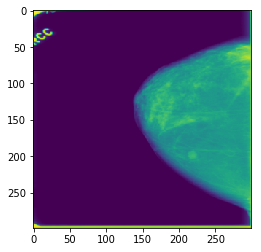

In [7]:
plt.imshow(loaded_training_images_list[0])

In [8]:
# Convert the iamge list and label list to numpy arrays
X = np.array(loaded_training_images_list)
y = y_numeric


In [9]:
len(X)

198

In [10]:
X[34].shape

(299, 299)

In [11]:
img0_copies = [X[0], X[0], X[0]]
np.stack(img0_copies, axis=-1).shape

(299, 299, 3)

In [12]:
X_stacked = np.array([np.stack([img, img, img], axis=-1) for img in X])

In [13]:
X_stacked[0].shape

(299, 299, 3)

In [14]:
len(X_stacked)

198

In [15]:
# Let's make the training and validation subsets (from the training data itself!)
X_train, X_valid = X_stacked[:100][:60], X_stacked[100:][60:]
y_train, y_valid = y[:100][:60], y[100:][60:]

In [16]:
print('shape of X_train: ', X_train.shape, '\n shape of X_valid: ', X_valid.shape)

shape of X_train:  (60, 299, 299, 3) 
 shape of X_valid:  (38, 299, 299, 3)


In [17]:
# Now that we have a numerical encoding of our breast density
# labels, let's start building the 2D ConvNet model!

from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Dense, Flatten
from keras.models import Sequential
from keras import optimizers

model = Sequential()

# First layer
model.add(Conv2D(32, (3, 3),  input_shape=(299, 299, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))


# Second layer
model.add( Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
"""

"""
# Third layer
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))


# Final Layer
model.add(Flatten())
model.add(Dropout(0.5))
          
          
# Dense Layer
model.add(Dense(32))
model.add(Activation('relu'))

# Output Layer
model.add(Dense(1))
model.add(Activation('sigmoid'))


Using TensorFlow backend.


In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 297, 297, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 297, 297, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 148, 148, 32)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 700928)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 700928)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                22429728  
_________________________________________________________________
activation_2 (Activation)    (None, 32)                0         
__________

In [19]:
# Compile the CNN model
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
# Let's try to fit the neural network here
batch = 2
model.fit(X_train, y_train, batch_size=batch,
         epochs=10, verbose=1,
         validation_data=(X_valid, y_valid)
         )

Train on 60 samples, validate on 38 samples
Epoch 1/10
